# **DBSCAN**

## Cargue de librerías

In [2]:

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

/bin/bash: line 1: =1.26.6: No such file or directory


## Cargue de los datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path= '/content/drive/MyDrive/Aprendizaje NO supervisado/2025-2/Sesion 6/marketing_campaign.csv'
df= pd.read_csv(path, sep="\t")


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Creación de variables requeridas

In [6]:
df['Edad']= 2014 - df['Year_Birth'] #Creación de la variable de edad
var_gast= ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df['gast_per']= df[var_gast].sum(axis=1) #Creación de la variable del gasto total entre todas las categorias

## Limpieza de datos

In [7]:
df= df.dropna() # Eliminación de registros con datos faltantes

## Creación del dataset para el clustering solicitado
Se requiere un dataset solo con las personas casadas *Married* que tengan hijos pequeños *Kidhome* viviendo en casa.

In [8]:
dfn= df[(df['Marital_Status']== 'Married') & df['Kidhome']>0]


## Exploración visual de los datos

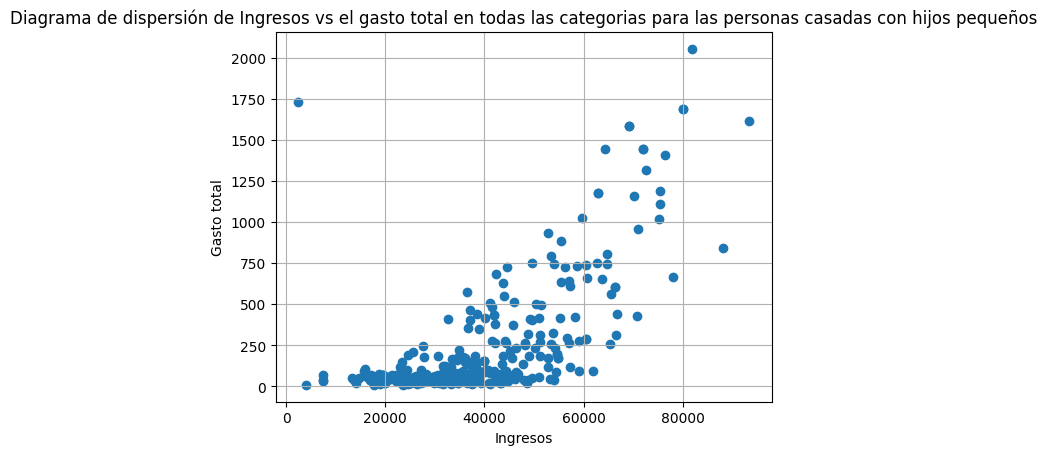

In [9]:
plt.scatter(dfn['Income'], dfn['gast_per'])
plt.title('Diagrama de dispersión de Ingresos vs el gasto total en todas las categorias para las personas casadas con hijos pequeños')
plt.xlabel('Ingresos')
plt.ylabel('Gasto total')
plt.grid(True)

## Selección de variables y estandarización para clustering

Siempre es importante analizar cuales son las variables más relevantes para hacer el clustering.

En este caso, se ha solicitado que se trabaje con los ingresos y los gatos del periodo

Luego, se deben estandarizar los datos

In [10]:
data= dfn.loc[:, ['Income','gast_per']] # Se seleccionan solo las dos columnas con las que se va a trabajar
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

## Creación del modelo de clustering con DBSCAN
Se deben seleccionar el Epsilon, que corresponde a la distancia entre los puntos y el número mínimo de puntos para que un punto haga parte del cluster.

Por defecto se utiliza un epsilon de 0.5 y un número mínimo de puntos de 5.

eps=0.5 significa que dos puntos están en el mismo vecindario si su distancia Euclidiana es ≤ 0.5.

In [11]:
db = DBSCAN(eps=0.5, min_samples=5).fit(scaled_features)


## Cargue de las etiquetas en el dataframe con todas las variables

In [12]:
dfn.loc[:, 'dbscan_labels'] = db.labels_

/tmp/ipython-input-3539308675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn.loc[:, 'dbscan_labels'] = db.labels_


Se usa .loc para asegurar que la asignación se realice directamente sobre el DataFrame original, evitando posibles advertencias relacionadas con asignaciones encadenadas. Los valores de esta nueva columna se toman del atributo db.labels_, el cual contiene las etiquetas de los clústeres asignadas a cada punto de datos por el algoritmo DBSCAN.

In [13]:
dfn

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edad,gast_per,dbscan_labels
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,33,422,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,3,11,0,29,169,0
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,0,0,0,0,3,11,0,34,96,0
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,0,0,0,0,3,11,0,35,1730,-1
26,2404,1976,Graduation,Married,53359.0,1,1,27-05-2013,4,173,...,0,0,0,0,3,11,0,38,257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,9014,1975,Graduation,Married,37085.0,1,1,26-06-2014,65,39,...,0,0,0,0,3,11,0,39,61,0
2223,1448,1963,Master,Married,33562.0,1,2,25-06-2014,33,21,...,0,0,0,0,3,11,0,51,51,0
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,0,0,0,0,3,11,0,35,653,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,3,11,0,40,30,0


In [14]:
dfn['dbscan_labels'].value_counts()

,count
dbscan_labels,
0,328
1,13
-1,8


## Interpretación en DBSCAN

    Clusters densos y bien separados:
        Si DBSCAN encuentra buenos clusters, el coeficiente de silueta será alto (>0.5), indicando que los puntos están bien agrupados.

    Clusters con ruido o mal definidos:
        Muchos puntos con S(i)≈ 0 o negativos pueden indicar que ε o minPts no son adecuados.
        
        Si ε es muy grande, los clusters pueden estar fusionados, reduciendo la calidad del clustering.

        Si ε es muy pequeño, DBSCAN puede marcar muchos puntos como ruido, disminuyendo el coeficiente de silueta.

    Ruido (-1 en DBSCAN):
        Los puntos marcados como ruido no tienen cluster asignado, por lo que en la implementación estándar de sklearn.metrics.silhouette_score(), estos puntos suelen ser ignorados en el cálculo.
       

## Evaluación del modelo
Coeficiente de la silueta *Silhouette Score*
Esta es una medida de cohesión, que indica que tan bien asignadas están las observaciones dentro del cluster respectivo.

In [15]:
dbscan_labels = db.labels_
silhouette_avg = silhouette_score(scaled_features, dbscan_labels)
print("DBSCAN Silhouette Score:", silhouette_avg)

DBSCAN Silhouette Score: 0.6469545045735967


## ¿Cómo seleccionar los valores más apropiados para el modelo de `DBSCAN`?
Aunque el coeficiente de la silueta es un indicador del performance del modelo.
Probaremos con diferentes combinaciones para los valores de epsilon y del número mínimo de puntos para analizar el desempeño del modelo de DBSCAN con los valores respectivos.

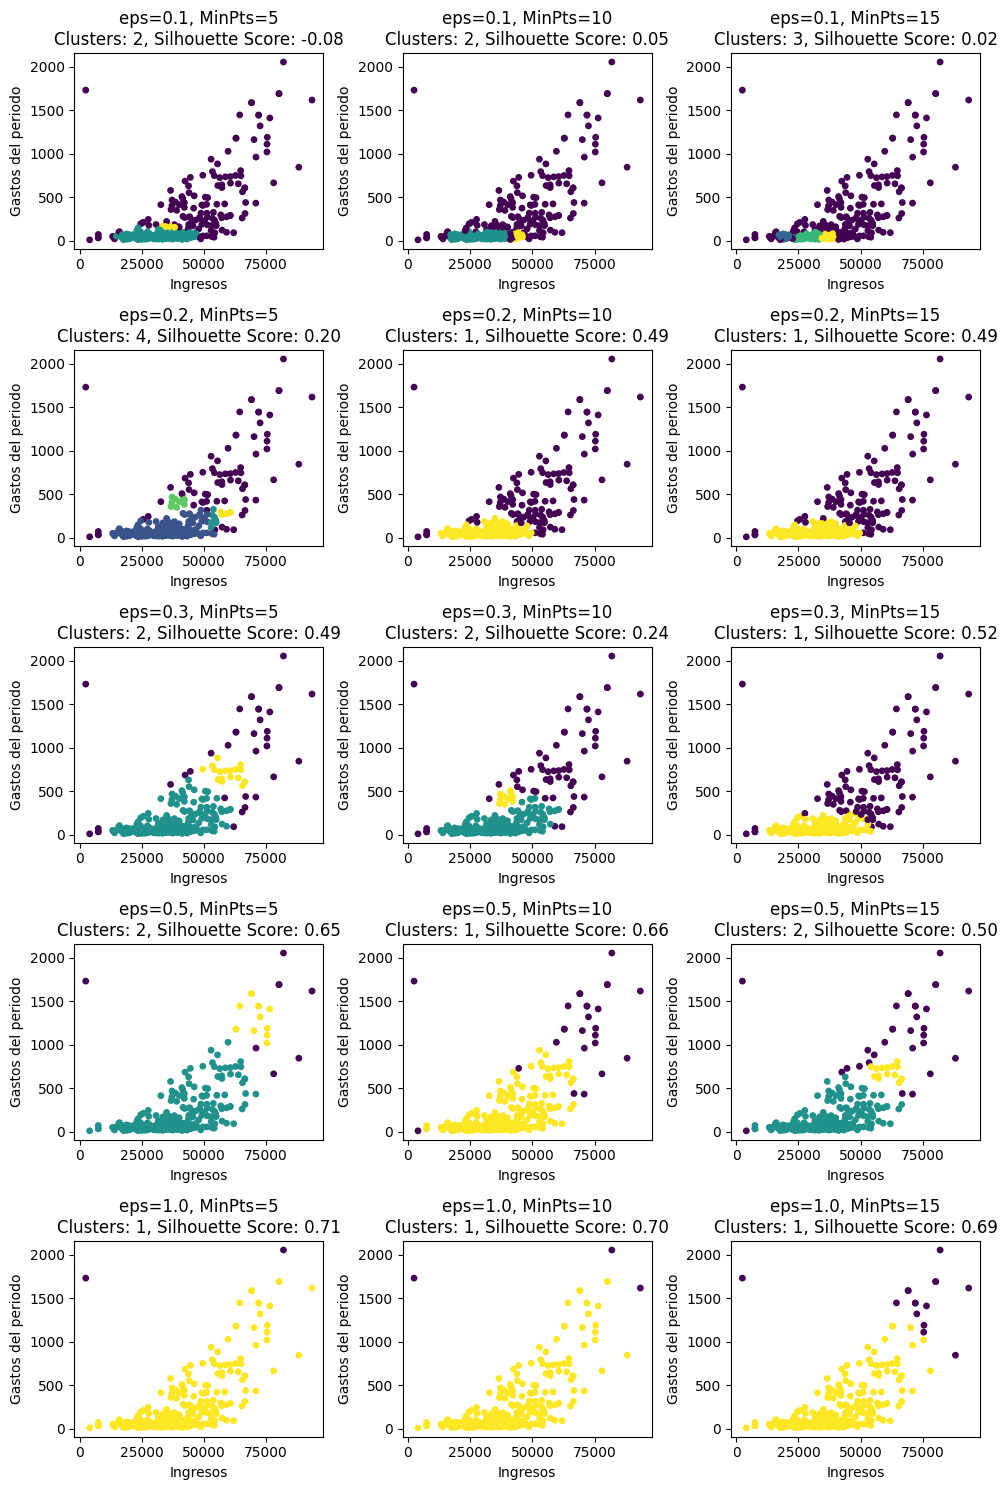

In [16]:
eps_values = [0.1, 0.2, 0.3, 0.5, 1.0]
minPts_values = [5, 10, 15]

results = []
fig, axs = plt.subplots(len(eps_values), len(minPts_values), figsize=(10, 15))

for i, minPts in enumerate(minPts_values):
    for j, eps in enumerate(eps_values):

        dbscan_model = DBSCAN(eps=eps, min_samples=minPts)
        dbscan_labels = dbscan_model.fit_predict(scaled_features)


        silhouette_avg = silhouette_score(scaled_features, dbscan_labels)

        unique_labels = set(dbscan_model.labels_)
        unique_labels.discard(-1)
        num_clusters = len(unique_labels)


        axs[j, i].scatter(data['Income'], data['gast_per'], c=dbscan_labels, s=15)
        axs[j, i].set_title(f'eps={eps}, MinPts={minPts}\nClusters: {num_clusters}, Silhouette Score: {silhouette_avg:.2f}')
        axs[j, i].set_ylabel('Gastos del periodo')
        axs[j, i].set_xlabel('Ingresos')


        results.append({
            'Epsilon (eps)': eps,
            'MinPts': minPts,
            'Silhouette Score': silhouette_avg,
            'Numero de clusters': num_clusters
        })

plt.tight_layout()
plt.show()

Como podemos observar, tenemos modelos con un coeficiente de la silueta muy alto, pero solo nos están generando un solo cluster, por lo tanto, no tienen  mucho sentido utilizarlos.

In [17]:
results_df= pd.DataFrame(results)
results_df

,Epsilon (eps),MinPts,Silhouette Score,Numero de clusters
0,0.1,5,-0.081653,2
1,0.2,5,0.203546,4
2,0.3,5,0.491115,2
3,0.5,5,0.646955,2
4,1.0,5,0.708748,1
5,0.1,10,0.047846,2
6,0.2,10,0.490807,1
7,0.3,10,0.236973,2
8,0.5,10,0.663079,1
9,1.0,10,0.703001,1


Text(0.5, 1.0, 'Desempeño de los modelos según el coeficiente de la silueta')

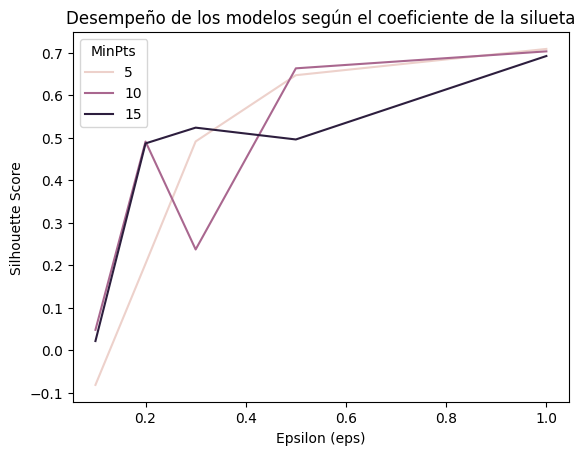

In [18]:
sns.lineplot(x=results_df['Epsilon (eps)'], y=results_df['Silhouette Score'], hue=results_df['MinPts'])
plt.title('Desempeño de los modelos según el coeficiente de la silueta')

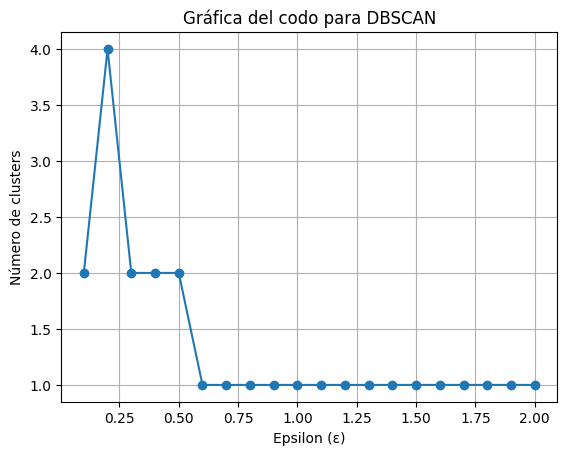

In [19]:
epsilon_values = np.linspace(0.1, 2.0, 20)


num_clusters = []


for epsilon in epsilon_values:
    dbscan_model = DBSCAN(eps=epsilon)
    dbscan_labels = dbscan_model.fit_predict(scaled_features)


    num_clusters.append(len(np.unique(dbscan_labels)) - 1)


plt.plot(epsilon_values, num_clusters, marker='o')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Número de clusters')
plt.title('Gráfica del codo para DBSCAN')
plt.grid(True)
plt.show()

Actualizamos el modelo con los hiperparametros seleccionados y actualizamos las etiquetas del clustering en el dataset con todas las variables.

In [20]:
db = DBSCAN(eps=0.3, min_samples=5).fit(scaled_features)
dfn.loc[:, 'dbscan_labels'] = db.labels_

Text(0.5, 1.0, 'Diagrama de dispersión para DBSCAN')

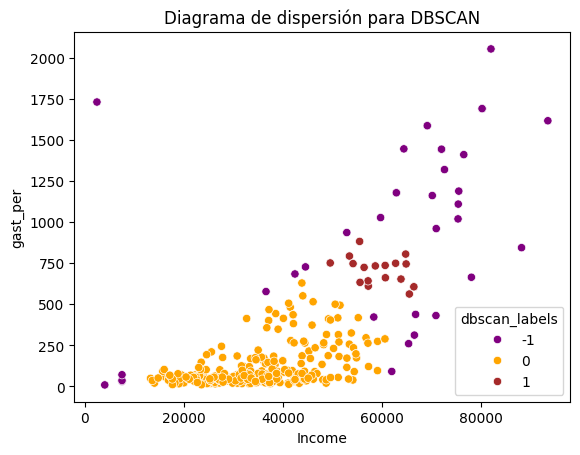

In [21]:
custom_palette = {-1:'purple', 0:'orange', 1:'brown'}
sns.scatterplot(data=dfn,x='Income',y='gast_per', hue='dbscan_labels', palette=custom_palette)
plt.title('Diagrama de dispersión para DBSCAN')

## Correlación por clúster entre las variables (Ingresos y gastos total)

In [22]:
dfn.groupby('dbscan_labels')[['Income','gast_per']].corr()

Income  gast_per
dbscan_labels                             
-1            Income    1.000000  0.532987
              gast_per  0.532987  1.000000
 0            Income    1.000000  0.461512
              gast_per  0.461512  1.000000
 1            Income    1.000000 -0.404677
              gast_per -0.404677  1.000000

## Exploración de los clústers por las otras variables disponibles

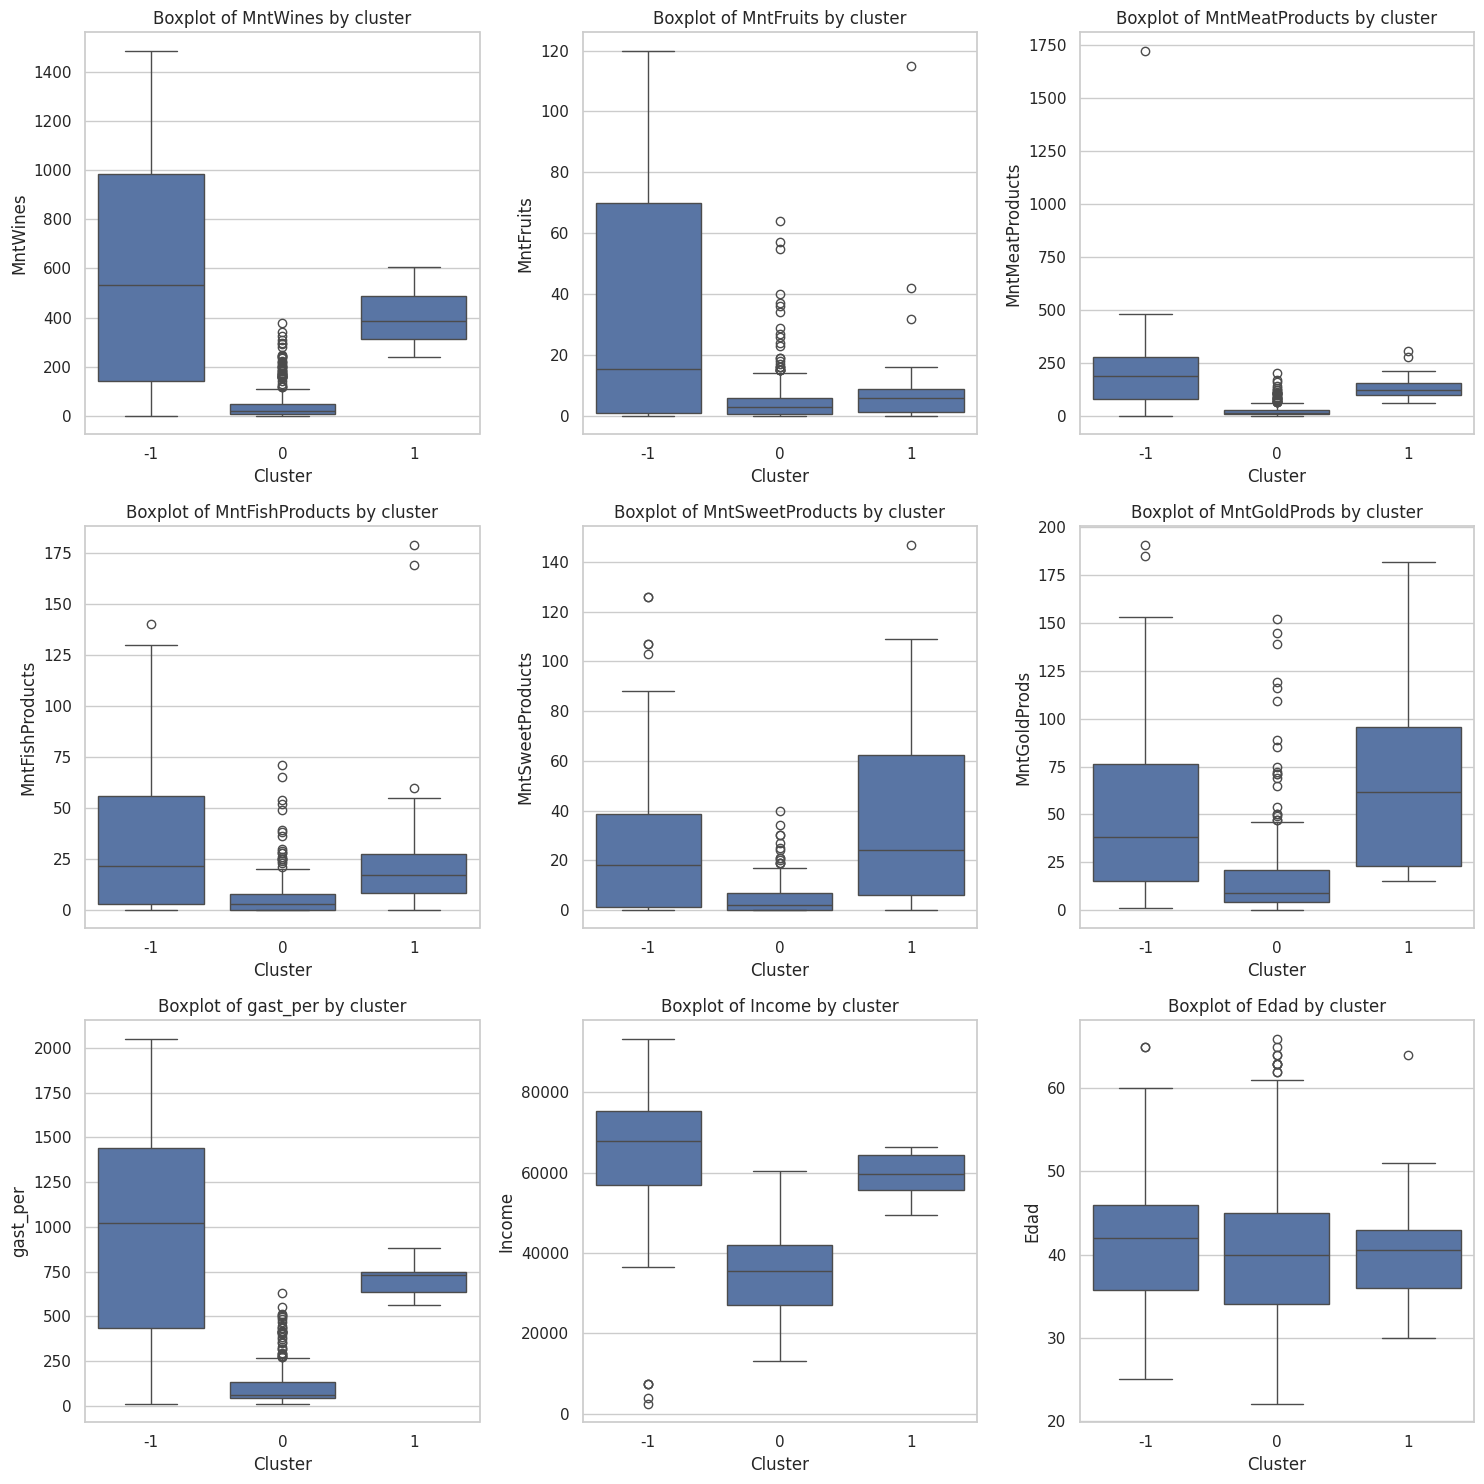

In [23]:
import math
columns_to_keep = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'gast_per', 'Income', 'Edad', 'dbscan_labels']
dfn2 = dfn.loc[:, columns_to_keep]


num_columns = min(len(columns_to_keep), 9)
num_rows = math.ceil(num_columns / 3)


sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))


for i, column in enumerate(columns_to_keep[:9]):
    row = i // 3
    col = i % 3
    sns.boxplot(x='dbscan_labels', y=column, data=dfn2, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column} by cluster')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel(column)


for i in range(num_columns, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])


plt.tight_layout()
plt.show()

#**KMEANS**

In [24]:
kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
  )

In [25]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [26]:
kmeans.inertia_

186.4250793650432

In [27]:
kmeans.cluster_centers_

array([[-0.87572712, -0.48708812],
       [ 1.70540353,  2.23307434],
       [ 0.30982237, -0.17655352]])

In [28]:
kmeans_labels = kmeans.predict(scaled_features)


In [29]:
standardized_centroids = kmeans.cluster_centers_

original_centroids = scaler.inverse_transform(standardized_centroids)
original_centroids

array([[2.53053916e+04, 5.74825175e+01],
       [6.49878182e+04, 1.01156818e+03],
       [4.35320864e+04, 1.66401235e+02]])

In [30]:
dfn['kmeans_labels']= kmeans_labels
dfn

/tmp/ipython-input-1384630203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['kmeans_labels']= kmeans_labels


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edad,gast_per,dbscan_labels,kmeans_labels
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,33,422,-1,2
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,3,11,0,29,169,0,0
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,0,0,0,3,11,0,34,96,0,2
21,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,0,0,0,3,11,0,35,1730,-1,1
26,2404,1976,Graduation,Married,53359.0,1,1,27-05-2013,4,173,...,0,0,0,3,11,0,38,257,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,9014,1975,Graduation,Married,37085.0,1,1,26-06-2014,65,39,...,0,0,0,3,11,0,39,61,0,2
2223,1448,1963,Master,Married,33562.0,1,2,25-06-2014,33,21,...,0,0,0,3,11,0,51,51,0,0
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,0,0,0,3,11,0,35,653,1,1
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,3,11,0,40,30,0,0


## Visualización de kmeans

Text(0.5, 0, 'Ingresos')

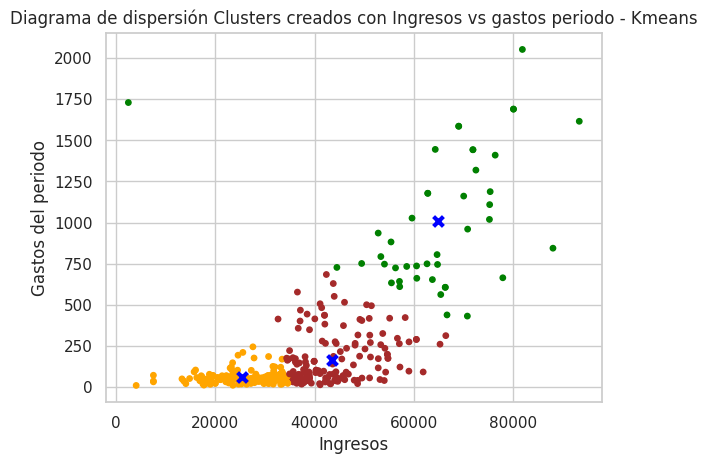

In [31]:
x_col = dfn['Income']
y_col = dfn['gast_per']

cluster_colors = {0: 'orange', 1: 'green', 2: 'brown'}
scatter_colors = [cluster_colors[label] for label in dfn['kmeans_labels']]

plt.scatter( x_col,y_col, c=scatter_colors, s=15)

standardized_centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(standardized_centroids)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=50,
    linewidths=3,
    color="blue",
    zorder=10,
)
plt.title('Diagrama de dispersión Clusters creados con Ingresos vs gastos periodo - Kmeans')
plt.ylabel('Gastos del periodo')
plt.xlabel('Ingresos')

In [32]:
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print("Kmeans Silhouette Score:", silhouette_avg)

Kmeans Silhouette Score: 0.452285132115286


# Detección de outliers

In [49]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=42)
clf.fit(data)

# Predicción de outliers
y_pred = clf.predict(data)

# Número de outliers
n_outliers = (y_pred == -1).sum()
print("\nNumber of outliers detected:", n_outliers)


Number of outliers detected: 73


Se cargan las etiquetas de los outliers en el dataset

In [50]:
dfn['outliers']= y_pred

/tmp/ipython-input-3987881272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['outliers']= y_pred


##`Tarea:`

1.   Visualizar los outliers en un gráfico de dispersión
2.   Correr los algoritmos de clustering sin los outliers y analizar los resultados.
